# Health Analysis

In [1]:
%run analysis_functions.ipynb

In [2]:
df, arguments = read_clean_data()
sheet_id = arguments["sheet_id"]
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}"

<hr style="height:2px;border-width:0;color:black;background-color:black">

## Cervical mucus charting

In [3]:
chart = chart_cervical_mucus(
    df,
    with_text=False,
    outfile="charting",
)

### ![](charting.png)

In [4]:
chart = chart_cervical_mucus(
    df,
    with_text=True,
    outfile="charting_with_text",
)

### ![](charting_with_text.png)

<hr style="height:2px;border-width:0;color:black;background-color:black">

## Symptoms snapshot

In [5]:
numeric_metrics = [
#     "pelvic pain",
#     "stomach pain",
    "BMs",
    "previous night Oura score",
    "steps",
]

categorical_metrics = [
    "pelvic pain",
    "stomach pain",
    "fatigue",
    "headache",
    "uncomfortable stomach",
    "visibly bloated stomach",
    "diarrhea",
    "nauseous",
    "white clouds in urine",
]

#### Last month

In [6]:
# last N days, excluding most recent, incomplete day
last_n_days = 30
start_dt = df[- last_n_days - 1: -1].index.min()
end_dt = df[- last_n_days - 1: -1].index.max()
min_pain = 3

summary = generate_summary(
    df,
    start_dt,
    end_dt,
    categorical_metrics,
    numeric_metrics,
    min_pain=min_pain,
)
print(summary)

12/27/23 - 01/25/24

93% of days had visibly bloated stomach.
93% of days had fatigue.
87% of days had stomach pain at least 3 / 10.
83% of days had pelvic pain at least 3 / 10.
70% of days had headache.
50% of days had white clouds in urine.
37% of days had nausea.
33% of days had uncomfortable stomach.
17% of days had diarrhea.

3 BMs / day
83 / 100 sleep score
9,809 steps / day



In [7]:
# Right before second surgery
start_dt = datetime.datetime(2023, 9, 1)
end_dt = datetime.datetime(2023, 9, 26)

<hr style="height:2px;border-width:0;color:black;background-color:black">

## Medications

#### Today

In [8]:
# second to last day, since today likely isn't over yet
end_dt = df.index[-2]
n_days = 1

summary = generate_med_summary(
    df,
    end_dt,
    n_days,
)
print(summary)

01/25/24

11 mg CBD / day
11 mg THC / day
40 mg Omeprazole / day
250 mg Vitamin B / day
25 mg DHEA / day
50 mg Pycnogenol / day
1000 mg fish oil / day
1 ml THC / day
1 ml THC/CBD / day
1000 mcg Vitamin B / day
2000 IU Vitamin D / day



<hr style="height:2px;border-width:0;color:black;background-color:black">

### Check side effects from medication

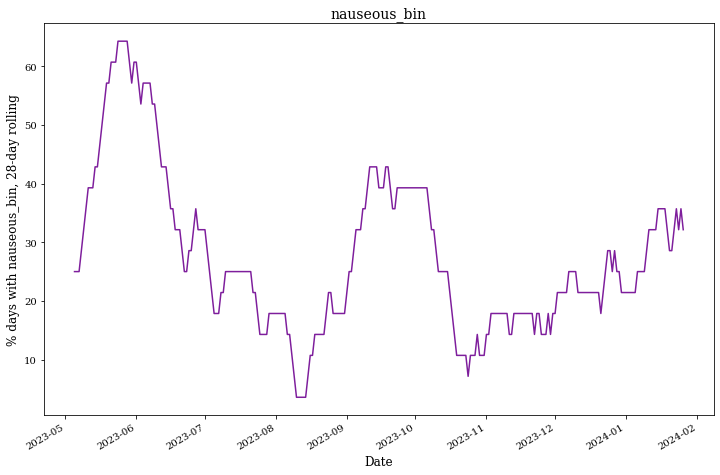

In [10]:
df["nauseous_bin"] = df["nauseous"].astype(str).map(clean_categorical)

metric = "nauseous_bin"
n_days = 28

fig, ax = plt.subplots(figsize=(12, 8), facecolor="w")
plt.plot(
    df.index,
    df[metric].rolling(n_days).mean() * 100,
)

plt.xlabel("Date", size=12)
plt.ylabel(f"% days with {metric}, {n_days}-day rolling", size=12)
plt.title(metric, size=14)
fig.autofmt_xdate()

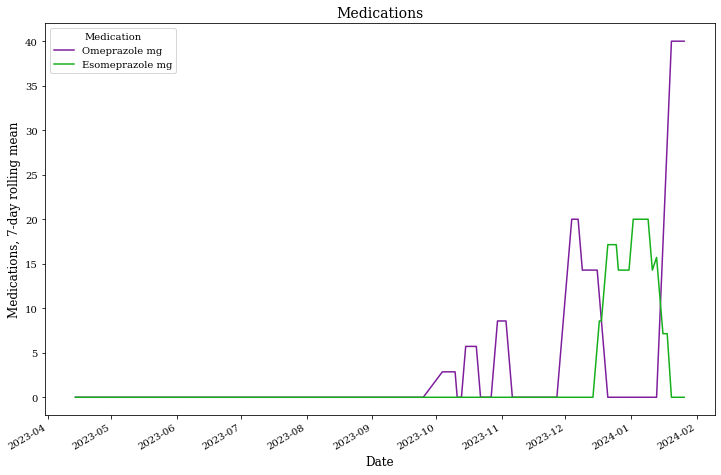

In [11]:
cols = ["Omeprazole mg", "Esomeprazole mg"]
n_days = 7

fig, ax = plt.subplots(figsize=(12, 8), facecolor="w")
for col in cols:
    plt.plot(
        df.index,
        df[col].rolling(n_days).mean(),
        label=col,
    )

plt.xlabel("Date", size=12)
plt.ylabel(f"Medications, {n_days}-day rolling mean", size=12)
plt.title("Medications", size=14)
plt.legend(title="Medication")
fig.autofmt_xdate()

In [12]:
df.loc[df["Omeprazole mg"] == 40].index

DatetimeIndex(['2024-01-14', '2024-01-15', '2024-01-16', '2024-01-17',
               '2024-01-18', '2024-01-19', '2024-01-20', '2024-01-21',
               '2024-01-22', '2024-01-23', '2024-01-24', '2024-01-25',
               '2024-01-26'],
              dtype='datetime64[ns]', name='date clean', freq=None)

In [13]:
categorical_metrics = ["nauseous"]

In [14]:
# after surgery, before taking a lot of Omeprazole
start_dt = datetime.datetime(2023, 11, 1)
end_dt = datetime.datetime(2023, 12, 31)

summary = generate_summary(
    df,
    start_dt,
    end_dt,
    categorical_metrics,
)
print(summary)

11/01/23 - 12/31/23

23% of days had nausea.




In [15]:
# directly before increasing Omeprazole
start_dt = datetime.datetime(2024, 1, 1)
end_dt = datetime.datetime(2024, 1, 13)

summary = generate_summary(
    df,
    start_dt,
    end_dt,
    categorical_metrics,
)
print(summary)

01/01/24 - 01/13/24

31% of days had nausea.




In [16]:
# after taking Omeprazole
start_dt = datetime.datetime(2024, 1, 14)
end_dt = datetime.datetime(2024, 1, 25)

summary = generate_summary(
    df,
    start_dt,
    end_dt,
    categorical_metrics,
)
print(summary)

01/14/24 - 01/25/24

42% of days had nausea.


